# Phân tích dữ liệu Bồi thường Bảo hiểm trách nhiệm dân sự đối với bên thứ ba

### Thông tin về bộ dữ liệu:
  
Bảo hiểm trách nhiệm dân sự đối với bên thứ ba là một loại bảo hiểm bắt buộc dành cho chủ xe cơ giới tại Úc.  
Bảo hiểm bên thứ ba đây là sản phẩm bảo hiểm trách nhiệm pháp lý của Bên mua bảo hiểm đối với Bên thứ 3 phát sinh khi xảy ra tai nạn gây thiệt hại về người và tài sản.  
Bộ dữ liệu ausprivauto0405 được dựa trên số liệu về số hợp đồng bảo hiểm trách nhiệm dân sự đối với bên thứ ba dành cho xe cơ giới của một công ty bảo hiểm trong giai đoạn 2004 đến 2005.  
Tổng cộng có 67856 hợp đồng, trong đó 4624 hợp đồng có ít nhất một yêu cầu bồi thường.  

### Định nghĩa các trường thông tin:

`1. `Exposure: Số năm hiệu lực của hợp đồng.\
`2. `VehValue: Giá trị của xe tính bằng nghìn AUD.\
`3. `VehAge: Nhóm tuổi của xe.\
`4. `VehBody: Loại thân xe.\
`5. `Gender: Giới tính của chủ xe.\
`6. `DrivAge: Nhóm tuổi của chủ xe.\
`7. `ClaimOcc: Thể hiện có yêu cầu bồi thường (hiển thị giá trị 1) hoặc không có yêu cầu bồi thường (hiển thị giá trị 0).\
`8. `ClaimNb: Số yêu cầu bồi thường.\
`9. `ClaimAmount: Tổng số tiền bồi thường.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadr
import matplotlib.pyplot as plt

In [2]:
#Tải bộ dữ liệu
ausprivauto0405 = pyreadr.read_r("ausprivauto0405.rda")
ausprivauto0405_data = pd.DataFrame(ausprivauto0405["ausprivauto0405"])

#Xem nhanh 5 dòng đầu tiên
ausprivauto0405_data.head(5)

,Exposure,VehValue,VehAge,VehBody,Gender,DrivAge,ClaimOcc,ClaimNb,ClaimAmount
0,0.303901,1.06,old cars,Hatchback,Female,young people,0,0,0.0
1,0.648871,1.03,young cars,Hatchback,Female,older work. people,0,0,0.0
2,0.569473,3.26,young cars,Utility,Female,young people,0,0,0.0
3,0.317591,4.14,young cars,Station wagon,Female,young people,0,0,0.0
4,0.648871,0.72,oldest cars,Hatchback,Female,young people,0,0,0.0


In [3]:
#Thông tin chung về bộ dữ liệu
ausprivauto0405_data.info()

#Kiểm tra các giá trị bị thiếu
ausprivauto0405_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Exposure     67856 non-null  float64 
 1   VehValue     67856 non-null  float64 
 2   VehAge       67856 non-null  category
 3   VehBody      67856 non-null  category
 4   Gender       67856 non-null  category
 5   DrivAge      67856 non-null  category
 6   ClaimOcc     67856 non-null  int32   
 7   ClaimNb      67856 non-null  int32   
 8   ClaimAmount  67856 non-null  float64 
dtypes: category(4), float64(3), int32(2)
memory usage: 2.3 MB


Exposure       0
VehValue       0
VehAge         0
VehBody        0
Gender         0
DrivAge        0
ClaimOcc       0
ClaimNb        0
ClaimAmount    0
dtype: int64

In [4]:
#Thống kê chung của các cột
ausprivauto0405_data.describe(include='all')

,Exposure,VehValue,VehAge,VehBody,Gender,DrivAge,ClaimOcc,ClaimNb,ClaimAmount
count,67856.000000,67856.000000,67856,67856,67856,67856,67856.000000,67856.000000,67856.000000
unique,NaN,NaN,4,13,2,6,NaN,NaN,NaN
top,NaN,NaN,old cars,Sedan,Female,older work. people,NaN,NaN,NaN
freq,NaN,NaN,20064,22233,38603,16189,NaN,NaN,NaN
mean,0.468652,1.777021,NaN,NaN,NaN,NaN,0.068144,0.072757,137.270167
std,0.290025,1.205232,NaN,NaN,NaN,NaN,0.251995,0.278204,1056.297768
min,0.002738,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,0.219028,1.010000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,0.446270,1.500000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,0.709103,2.150000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [7]:
#Tổng quan các biến ở các cột chứa dữ liệu phân loại
non_numeric_columns = ('VehAge', 'VehBody', 'Gender', 'DrivAge')
for column in non_numeric_columns:
    print(f"{column}:{ausprivauto0405_data[column].unique().to_list()}")

VehAge:['old cars', 'young cars', 'oldest cars', 'youngest cars']
VehBody:['Hatchback', 'Utility', 'Station wagon', 'Hardtop', 'Panel van', 'Sedan', 'Truck', 'Coupe', 'Minibus', 'Motorized caravan', 'Bus', 'Convertible', 'Roadster']
Gender:['Female', 'Male']
DrivAge:['young people', 'older work. people', 'oldest people', 'working people', 'old people', 'youngest people']


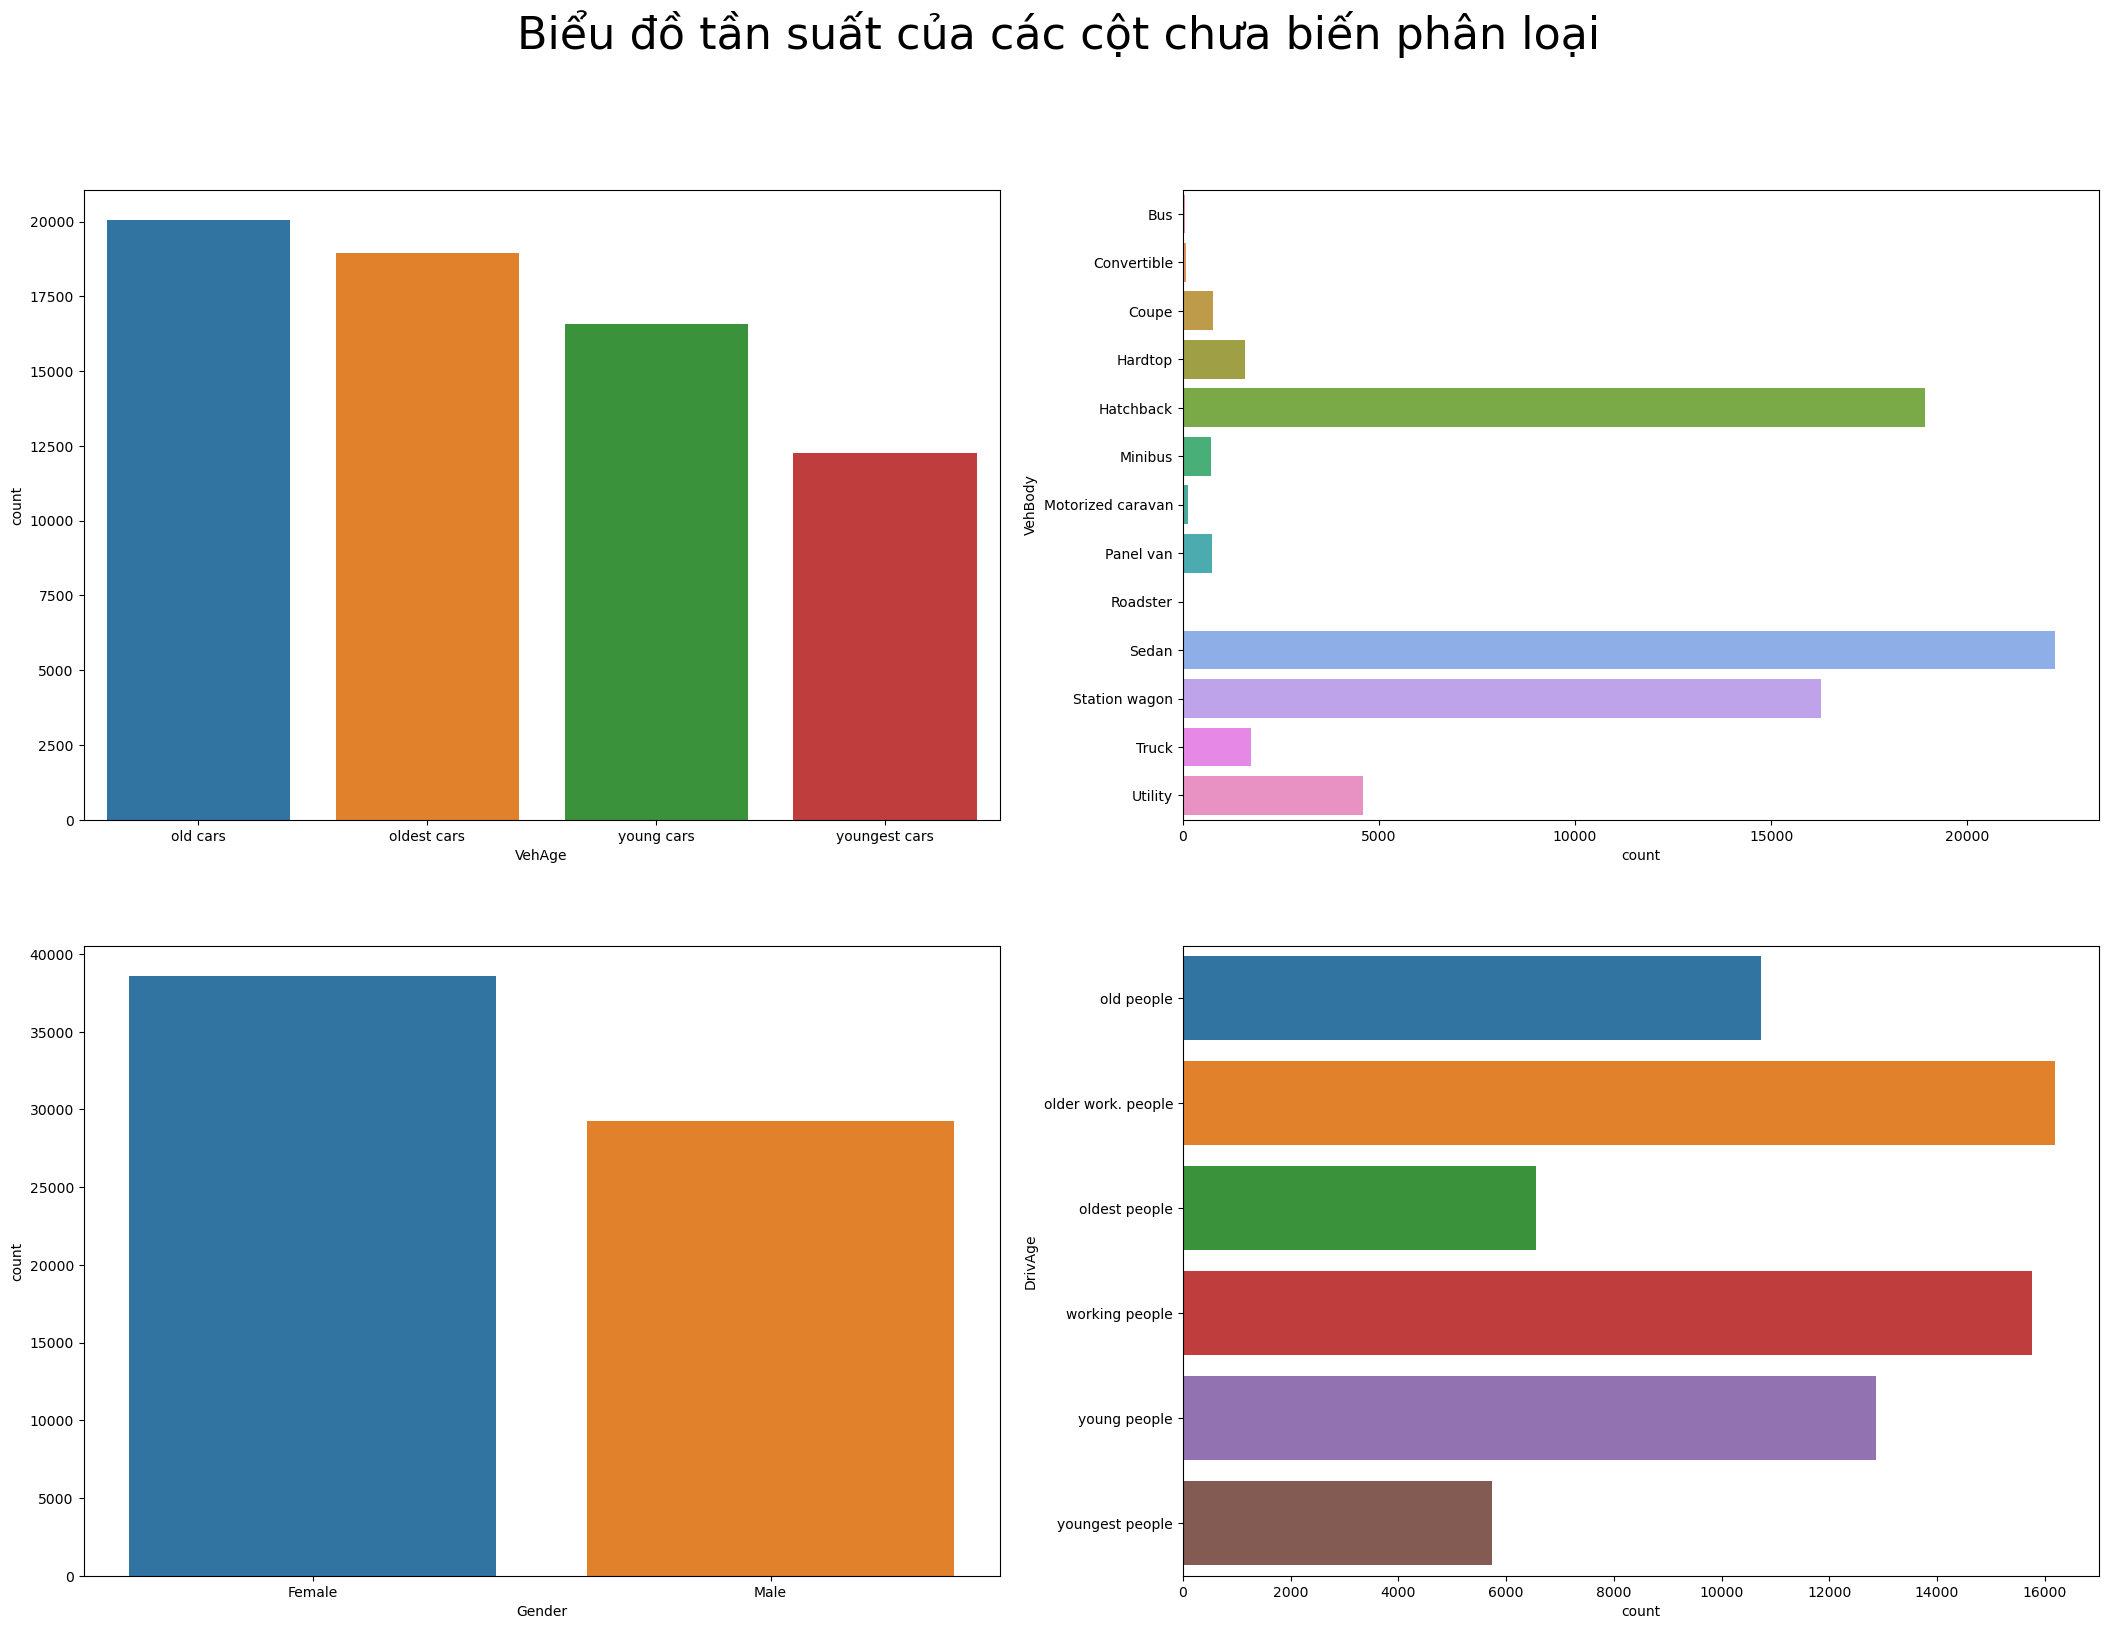

In [89]:
#Tạo lưới biểu đồ
fig, axes = plt.subplots(2,2, figsize=(26,18))
fig.suptitle('Biểu đồ tần suất của các cột chưa biến phân loại', fontsize=32)

#Vẽ biểu đồ tần suất của cột VehAge
VehAge_freq = sns.countplot(data=ausprivauto0405_data, x='VehAge', ax=axes[0,0])

#Vẽ biểu đồ tần suất của vột VehBody
VehBody_freq = sns.countplot(data=ausprivauto0405_data, y='VehBody', ax=axes[0,1], orient='h')

#Vẽ biểu đồ tần suất của cột Gender
Gender_freq = sns.countplot(data=ausprivauto0405_data, x='Gender', ax=axes[1,0])

#Vẽ biểu đồ tần suất của cột DrivAge
DrivAge_freq = sns.countplot(data=ausprivauto0405_data, y='DrivAge', ax=axes[1,1], orient ='h')

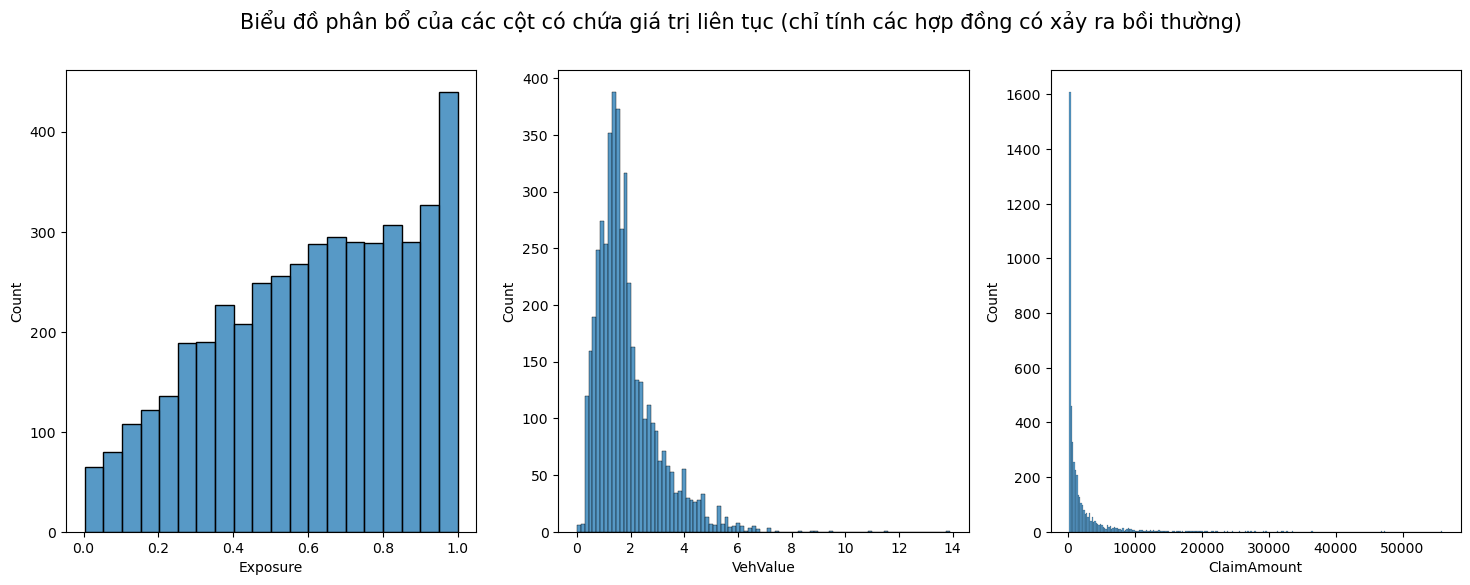

In [93]:
#Lọc các hợp đồng có xảy ra bồi thường
ausprivauto0405_data_claimocced = ausprivauto0405_data[ausprivauto0405_data['ClaimOcc']!=0]

#Tạo lưới biểu đồ
general_distributions, axes = plt.subplots(1,3, figsize=(18,6))
general_distributions.suptitle('Biểu đồ phân bổ của các cột có chứa giá trị liên tục (chỉ tính các hợp đồng có xảy ra bồi thường)',
                              fontsize=15)

#Vẽ biểu đồ phân bổ của Exposure
Exposure_dist = sns.histplot(data=ausprivauto0405_data_claimocced, x='Exposure', ax=axes[0])

#Vẽ biểu đồ phân bổ của VehValue
VehValue_dist = sns.histplot(data=ausprivauto0405_data_claimocced, x='VehValue', ax=axes[1])

#Vẽ biểu đồ phân bổ của ClaimAmount
ClaimAmount_dist = sns.histplot(data=ausprivauto0405_data_claimocced, x='ClaimAmount', ax=axes[2])

In [8]:
#Chuyển các giá trị ở cột VehAge và DrivAge thành dạng số tương ứng
cats_to_numeric_data = ausprivauto0405_data_claimocced.copy()
cats_to_numeric_dict = {
    'youngest people':1, 
    'young people':2, 
    'working people':3, 
    'older work. people':4, 
    'old people':5, 
    'oldest people': 6,
    'youngest cars':1,
    'young cars':2,
    'old cars':3,
    'oldest cars':4}
cats_to_numeric_data.replace(cats_to_numeric_dict, inplace=True)
columns = ['VehAge', 'DrivAge']
cats_to_numeric_data['VehAge']=pd.to_numeric(cats_to_numeric_data['VehAge'])
cats_to_numeric_data['DrivAge']=pd.to_numeric(cats_to_numeric_data['DrivAge'])
cats_to_numeric_data.dtypes

Exposure        float64
VehValue        float64
VehAge            int64
VehBody        category
Gender         category
DrivAge           int64
ClaimOcc          int32
ClaimNb           int32
ClaimAmount     float64
dtype: object

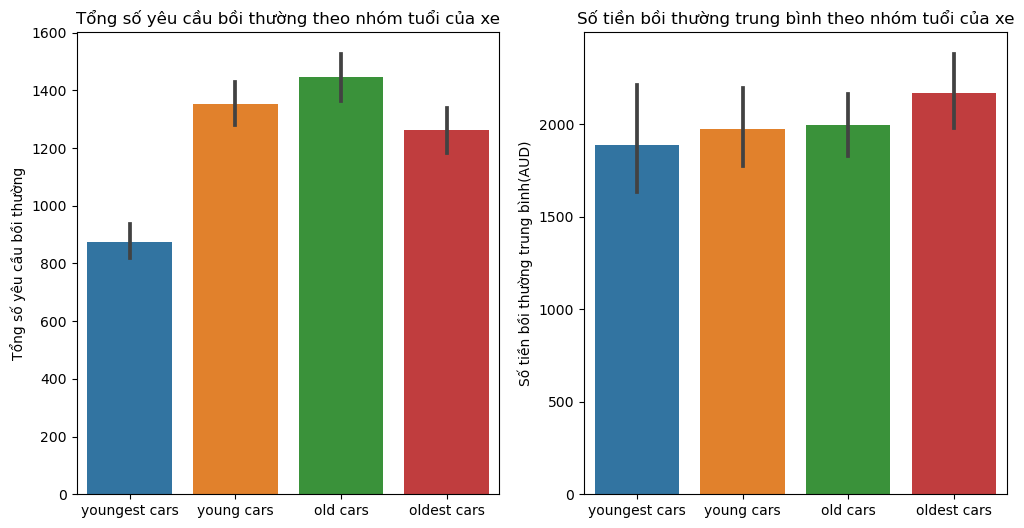

In [65]:
fig, axes =plt.subplots(1,2, figsize=(12,6))
#Vẽ biểu đồ thể hiện tổng số yêu cầu bồi thường theo nhóm tuổi của xe
VehAge_ClaimNb_plt = sns.barplot(data=ausprivauto0405_data, 
                                 x='VehAge', 
                                 y='ClaimNb', 
                                 estimator=sum,
                                 order=['youngest cars', 'young cars', 'old cars', 'oldest cars']
                                , ax=axes[0])
VehAge_ClaimNb_plt.set(title='Tổng số yêu cầu bồi thường theo nhóm tuổi của xe',
                      ylabel='Tổng số yêu cầu bồi thường',
                      xlabel='')
VehAge_ClaimNb_plt.ticklabel_format(style='plain', axis='y')
#Vẽ biểu đồ thể hiện số tiền bồi thường trung bình theo nhóm tuổi của xe
VehAge_ClaimAmount_plt = sns.barplot(data=ausprivauto0405_data_claimocced, 
                                     x='VehAge', 
                                     y='ClaimAmount',
                                     order=['youngest cars', 'young cars', 'old cars', 'oldest cars']
                                    , ax=axes[1])
VehAge_ClaimAmount_plt.set(title='Số tiền bồi thường trung bình theo nhóm tuổi của xe',
        ylabel='Số tiền bồi thường trung bình(AUD)',
        xlabel='')
VehAge_ClaimAmount_plt.ticklabel_format(style='plain', axis='y')

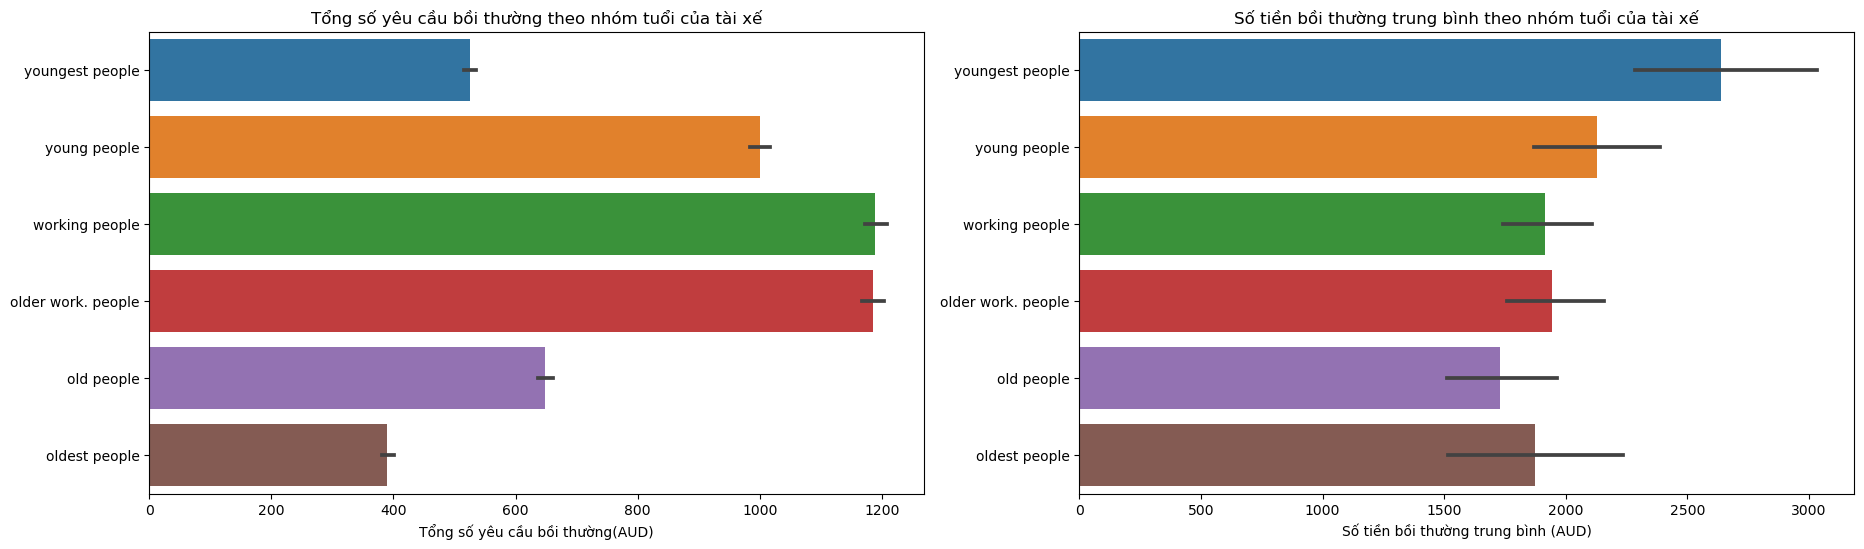

In [68]:
fig, axes =plt.subplots(1,2, figsize=(22,6))

#Vẽ biểu đồ thể hiện tổng số yêu cầu bồi thường theo nhóm tuổi của tài xế
DrivAge_ClaimNb_plt = sns.barplot(data=ausprivauto0405_data_claimocced, 
                                  y='DrivAge', 
                                  x='ClaimNb', 
                                  orient='h', 
                                  estimator=sum,
                                  order=['youngest people', 'young people', 'working people', 
                                             'older work. people', 'old people', 'oldest people'],
                                 ax=axes[0])
DrivAge_ClaimNb_plt.set(title='Tổng số yêu cầu bồi thường theo nhóm tuổi của tài xế', 
                            xlabel='Tổng số yêu cầu bồi thường(AUD)',
                            ylabel='')
DrivAge_ClaimNb_plt.ticklabel_format(style='plain', axis='x')

#Vẽ biểu đồ thể hiện số tiền bồi thường trung bình theo nhóm tuổi của tài xế
DrivAge_ClaimAmount_plt = sns.barplot(data=ausprivauto0405_data_claimocced, 
                                      y='DrivAge', 
                                      x='ClaimAmount', 
                                      orient='h',
                                      order=['youngest people', 'young people', 'working people', 
                                             'older work. people', 'old people', 'oldest people'],
                                     ax=axes[1])
DrivAge_ClaimAmount_plt.set(title='Số tiền bồi thường trung bình theo nhóm tuổi của tài xế',
                            xlabel='Số tiền bồi thường trung bình (AUD)',
                            ylabel='')
DrivAge_ClaimAmount_plt.ticklabel_format(style='plain', axis='x')